In [185]:
# Import libraries
import pandas as pd
import numpy as np

In [186]:
# Load Excel File
filename = 'data/car_financing.xlsx'
df = pd.read_excel(filename)
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
0,1,34689.96,687.23,202.93,484.30,34205.66,60,0.0702,Toyota Sienna
1,2,34205.66,687.23,200.10,487.13,33718.53,60,0.0702,Toyota Sienna
2,3,33718.53,687.23,197.25,489.98,33228.55,60,0.0702,Toyota Sienna
3,4,33228.55,687.23,194.38,492.85,32735.70,60,0.0702,Toyota Sienna
4,5,32735.70,687.23,191.50,495.73,32239.97,60,0.0702,Toyota Sienna


In [187]:
# Load car loan data from a csv file
filename2 =  'data/car_financing.csv'
df2 = pd.read_csv(filename2)
df2.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
0,1,34689.96,687.23,202.93,484.30,34205.66,60,0.0702,Toyota Sienna
1,2,34205.66,687.23,200.10,487.13,33718.53,60,0.0702,Toyota Sienna
2,3,33718.53,687.23,197.25,489.98,33228.55,60,0.0702,Toyota Sienna
3,4,33228.55,687.23,194.38,492.85,32735.70,60,0.0702,Toyota Sienna
4,5,32735.70,687.23,191.50,495.73,32239.97,60,0.0702,Toyota Sienna


In [188]:
# Check the column data types using the dtypes attribute
# For example, you can wrongly assume the values in one of your columns is 
# a int64 instead of a string. 
df.dtypes

Month                 int64
Starting Balance    float64
Repayment           float64
Interest Paid       float64
Principal Paid      float64
New Balance         float64
term                  int64
interest_rate       float64
car_type             object
dtype: object

In [189]:
# The info method gives the column datatypes + number of non-null values
# Notice that we seem to have 408 non-null values for all but the Interest Paid column. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             408 non-null    int64  
 1   Starting Balance  408 non-null    float64
 2   Repayment         408 non-null    float64
 3   Interest Paid     407 non-null    float64
 4   Principal Paid    408 non-null    float64
 5   New Balance       408 non-null    float64
 6   term              408 non-null    int64  
 7   interest_rate     408 non-null    float64
 8   car_type          408 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 28.8+ KB


In [190]:
df.sum()

Month                                                           11004
Starting Balance                                          7.16565e+06
Repayment                                                      290551
Interest Paid                                                 23046.5
Principal Paid                                                 267411
New Balance                                               6.89824e+06
term                                                            21600
interest_rate                                                  16.158
car_type            Toyota SiennaToyota SiennaToyota SiennaToyota ...
dtype: object

In [191]:
# Approach 1 dictionary substitution using rename method
df = df.rename(columns={'Starting Balance': 'starting_balance',
                        'Interest Paid': 'interest_paid', 
                        'Principal Paid': 'principal_paid',
                        'New Balance': 'new_balance'})

In [192]:
# Approach 2 list replacement
# Only changing Month -> month, but we need to list the rest of the columns
df.columns = ['month',
              'starting_balance',
              'Repayment',
              'interest_paid',
              'principal_paid',
              'new_balance',
              'term',
              'interest_rate',
              'car_type']
df.head()

,month,starting_balance,Repayment,interest_paid,principal_paid,new_balance,term,interest_rate,car_type
0,1,34689.96,687.23,202.93,484.30,34205.66,60,0.0702,Toyota Sienna
1,2,34205.66,687.23,200.10,487.13,33718.53,60,0.0702,Toyota Sienna
2,3,33718.53,687.23,197.25,489.98,33228.55,60,0.0702,Toyota Sienna
3,4,33228.55,687.23,194.38,492.85,32735.70,60,0.0702,Toyota Sienna
4,5,32735.70,687.23,191.50,495.73,32239.97,60,0.0702,Toyota Sienna


In [193]:
# sum the values in a column
# total amount of interest paid over the course of the loan
df['interest_paid'].sum()

23046.53

In [194]:
# Approach 1
# This approach allows you to drop multiple columns at a time 
df = df.drop(columns=['term'])
df.head()

,month,starting_balance,Repayment,interest_paid,principal_paid,new_balance,interest_rate,car_type
0,1,34689.96,687.23,202.93,484.30,34205.66,0.0702,Toyota Sienna
1,2,34205.66,687.23,200.10,487.13,33718.53,0.0702,Toyota Sienna
2,3,33718.53,687.23,197.25,489.98,33228.55,0.0702,Toyota Sienna
3,4,33228.55,687.23,194.38,492.85,32735.70,0.0702,Toyota Sienna
4,5,32735.70,687.23,191.50,495.73,32239.97,0.0702,Toyota Sienna


In [195]:
# Approach 2 use the del command
del df['Repayment']

In [196]:
df.shape

(408, 7)

In [197]:
# Select multiple columns using double brackets
df[['car_type', 'principal_paid']].head()

,car_type,principal_paid
0,Toyota Sienna,484.30
1,Toyota Sienna,487.13
2,Toyota Sienna,489.98
3,Toyota Sienna,492.85
4,Toyota Sienna,495.73


In [198]:
# pandas dataframe
df.loc[:, ['car_type']].head()

,car_type
0,Toyota Sienna
1,Toyota Sienna
2,Toyota Sienna
3,Toyota Sienna
4,Toyota Sienna


In [199]:
# pandas series
df.loc[:, 'car_type'].head()

0    Toyota Sienna
1    Toyota Sienna
2    Toyota Sienna
3    Toyota Sienna
4    Toyota Sienna
Name: car_type, dtype: object

In [200]:
# Select one column using single brackets
# This produces a pandas series which is a one-dimensional array which can be labeled
df['car_type'].head()

0    Toyota Sienna
1    Toyota Sienna
2    Toyota Sienna
3    Toyota Sienna
4    Toyota Sienna
Name: car_type, dtype: object

In [201]:
## Filtering 
car_filter = df['car_type']=='Toyota Sienna'
interest_filter = df['interest_rate']==0.0702
df = df.loc[car_filter & interest_filter, :]
df.head()

,month,starting_balance,interest_paid,principal_paid,new_balance,interest_rate,car_type
0,1,34689.96,202.93,484.30,34205.66,0.0702,Toyota Sienna
1,2,34205.66,200.10,487.13,33718.53,0.0702,Toyota Sienna
2,3,33718.53,197.25,489.98,33228.55,0.0702,Toyota Sienna
3,4,33228.55,194.38,492.85,32735.70,0.0702,Toyota Sienna
4,5,32735.70,191.50,495.73,32239.97,0.0702,Toyota Sienna


In [202]:
# missing values can be excluded in calculations by default. 
# excludes missing values in the calculation 
interest_missing = df['interest_paid'].isna()
# Looks at the row that contains the NaN for interest_paid
df.loc[interest_missing,:]

,month,starting_balance,interest_paid,principal_paid,new_balance,interest_rate,car_type
35,36,15940.06,NaN,593.99,15346.07,0.0702,Toyota Sienna


In [203]:
# Another way to look at where missing data is located
df['interest_paid'][30:40]

30    110.32
31    106.94
32    103.55
33    100.13
34     96.70
35       NaN
36     89.77
37     86.27
38     82.76
39     79.22
Name: interest_paid, dtype: float64

In [204]:
# Filling in the nan with a zero is probably a bad idea. 
#df['interest_paid'][30:40].fillna(0)

In [205]:
## back fill in value
df['interest_paid'][30:40].fillna(method = 'bfill')

30    110.32
31    106.94
32    103.55
33    100.13
34     96.70
35     89.77
36     89.77
37     86.27
38     82.76
39     79.22
Name: interest_paid, dtype: float64

In [206]:
# Another forward fill in value
#df['interest_paid'][30:40].fillna(method='ffill'

# linear interpolation (filling in of values)
#df['interest_paid'][30:40].interpolate(method = 'linear')

# Fill in with the actual value manually 
#interest_missing = df['interest_paid'].isna()
#df.loc[interest_missing,'interest_paid'] = 93.24

In [207]:
# The code counts the number of missing values
# sum() works because Booleans are a subtype of integers. 
df['interest_paid'].isna().sum()

1

In [208]:
# Fill in with the actual value
df.loc[interest_missing,'interest_paid'] = 93.24

In [209]:
# Let's first start by looking at the car_type column. 
df['car_type'].value_counts()

Toyota Sienna    60
Name: car_type, dtype: int64

In [210]:
# Notice that the filter produces a pandas series of True and False values
car_filter = df['car_type']=='Toyota Sienna'

In [211]:
car_filter.head()

0    True
1    True
2    True
3    True
4    True
Name: car_type, dtype: bool

In [212]:
# Approach 1 using square brackets
# Filter dataframe to get a DataFrame of only 'Toyota Sienna'
df[car_filter].head()

,month,starting_balance,interest_paid,principal_paid,new_balance,interest_rate,car_type
0,1,34689.96,202.93,484.30,34205.66,0.0702,Toyota Sienna
1,2,34205.66,200.10,487.13,33718.53,0.0702,Toyota Sienna
2,3,33718.53,197.25,489.98,33228.55,0.0702,Toyota Sienna
3,4,33228.55,194.38,492.85,32735.70,0.0702,Toyota Sienna
4,5,32735.70,191.50,495.73,32239.97,0.0702,Toyota Sienna


In [213]:
# Approach 2 using loc
# Filter dataframe to get a DataFrame of only 'Toyota Sienna'
df.loc[car_filter, :]

,month,starting_balance,interest_paid,principal_paid,new_balance,interest_rate,car_type
0,1,34689.96,202.93,484.30,34205.66,0.0702,Toyota Sienna
1,2,34205.66,200.10,487.13,33718.53,0.0702,Toyota Sienna
2,3,33718.53,197.25,489.98,33228.55,0.0702,Toyota Sienna
3,4,33228.55,194.38,492.85,32735.70,0.0702,Toyota Sienna
4,5,32735.70,191.50,495.73,32239.97,0.0702,Toyota Sienna
5,6,32239.97,188.60,498.63,31741.34,0.0702,Toyota Sienna
6,7,31741.34,185.68,501.55,31239.79,0.0702,Toyota Sienna
7,8,31239.79,182.75,504.48,30735.31,0.0702,Toyota Sienna
8,9,30735.31,179.80,507.43,30227.88,0.0702,Toyota Sienna
9,10,30227.88,176.83,510.40,29717.48,0.0702,Toyota Sienna


In [214]:
# Notice that it looks like nothing changed
# This is because we didn't update the dataframe after applying the filter
df['car_type'].value_counts()

Toyota Sienna    60
Name: car_type, dtype: int64

In [215]:
# Filter dataframe to get a DataFrame of only 'Toyota Sienna'
df = df.loc[car_filter, :]

In [216]:
df['car_type'].value_counts()

Toyota Sienna    60
Name: car_type, dtype: int64

In [217]:
df['interest_rate'].value_counts()

0.0702    60
Name: interest_rate, dtype: int64

In [218]:
interest_filter= df['interest_rate'] ==.0702

In [219]:
df = df.loc[interest_filter,:]

In [220]:
df['interest_rate'].value_counts(dropna = False)

0.0702    60
Name: interest_rate, dtype: int64

## Convert Pandas DataFrames to NumPy arrays or Dictionaries

In [221]:
df.head()

,month,starting_balance,interest_paid,principal_paid,new_balance,interest_rate,car_type
0,1,34689.96,202.93,484.30,34205.66,0.0702,Toyota Sienna
1,2,34205.66,200.10,487.13,33718.53,0.0702,Toyota Sienna
2,3,33718.53,197.25,489.98,33228.55,0.0702,Toyota Sienna
3,4,33228.55,194.38,492.85,32735.70,0.0702,Toyota Sienna
4,5,32735.70,191.50,495.73,32239.97,0.0702,Toyota Sienna


### Convert Pandas DataFrames to NumPy Arrays

In [222]:
# Approach 1
df.to_numpy()

array([[1, 34689.96, 202.93, 484.3, 34205.66, 0.0702, 'Toyota Sienna'],
       [2, 34205.66, 200.1, 487.13, 33718.53, 0.0702, 'Toyota Sienna'],
       [3, 33718.53, 197.25, 489.98, 33228.55, 0.0702, 'Toyota Sienna'],
       [4, 33228.55, 194.38, 492.85, 32735.7, 0.0702, 'Toyota Sienna'],
       [5, 32735.7, 191.5, 495.73, 32239.97, 0.0702, 'Toyota Sienna'],
       [6, 32239.97, 188.6, 498.63, 31741.34, 0.0702, 'Toyota Sienna'],
       [7, 31741.34, 185.68, 501.55, 31239.79, 0.0702, 'Toyota Sienna'],
       [8, 31239.79, 182.75, 504.48, 30735.31, 0.0702, 'Toyota Sienna'],
       [9, 30735.31, 179.8, 507.43, 30227.88, 0.0702, 'Toyota Sienna'],
       [10, 30227.88, 176.83, 510.4, 29717.48, 0.0702, 'Toyota Sienna'],
       [11, 29717.48, 173.84, 513.39, 29204.09, 0.0702, 'Toyota Sienna'],
       [12, 29204.09, 170.84, 516.39, 28687.7, 0.0702, 'Toyota Sienna'],
       [13, 28687.7, 167.82, 519.41, 28168.29, 0.0702, 'Toyota Sienna'],
       [14, 28168.29, 164.78, 522.45, 27645.84, 0.0702, '

In [223]:
# Approach 2
df.values

array([[1, 34689.96, 202.93, 484.3, 34205.66, 0.0702, 'Toyota Sienna'],
       [2, 34205.66, 200.1, 487.13, 33718.53, 0.0702, 'Toyota Sienna'],
       [3, 33718.53, 197.25, 489.98, 33228.55, 0.0702, 'Toyota Sienna'],
       [4, 33228.55, 194.38, 492.85, 32735.7, 0.0702, 'Toyota Sienna'],
       [5, 32735.7, 191.5, 495.73, 32239.97, 0.0702, 'Toyota Sienna'],
       [6, 32239.97, 188.6, 498.63, 31741.34, 0.0702, 'Toyota Sienna'],
       [7, 31741.34, 185.68, 501.55, 31239.79, 0.0702, 'Toyota Sienna'],
       [8, 31239.79, 182.75, 504.48, 30735.31, 0.0702, 'Toyota Sienna'],
       [9, 30735.31, 179.8, 507.43, 30227.88, 0.0702, 'Toyota Sienna'],
       [10, 30227.88, 176.83, 510.4, 29717.48, 0.0702, 'Toyota Sienna'],
       [11, 29717.48, 173.84, 513.39, 29204.09, 0.0702, 'Toyota Sienna'],
       [12, 29204.09, 170.84, 516.39, 28687.7, 0.0702, 'Toyota Sienna'],
       [13, 28687.7, 167.82, 519.41, 28168.29, 0.0702, 'Toyota Sienna'],
       [14, 28168.29, 164.78, 522.45, 27645.84, 0.0702, '

### Convert Pandas DataFrames to Dictionaries

In [224]:
df.to_dict()

{'month': {0: 1,
  1: 2,
  2: 3,
  3: 4,
  4: 5,
  5: 6,
  6: 7,
  7: 8,
  8: 9,
  9: 10,
  10: 11,
  11: 12,
  12: 13,
  13: 14,
  14: 15,
  15: 16,
  16: 17,
  17: 18,
  18: 19,
  19: 20,
  20: 21,
  21: 22,
  22: 23,
  23: 24,
  24: 25,
  25: 26,
  26: 27,
  27: 28,
  28: 29,
  29: 30,
  30: 31,
  31: 32,
  32: 33,
  33: 34,
  34: 35,
  35: 36,
  36: 37,
  37: 38,
  38: 39,
  39: 40,
  40: 41,
  41: 42,
  42: 43,
  43: 44,
  44: 45,
  45: 46,
  46: 47,
  47: 48,
  48: 49,
  49: 50,
  50: 51,
  51: 52,
  52: 53,
  53: 54,
  54: 55,
  55: 56,
  56: 57,
  57: 58,
  58: 59,
  59: 60},
 'starting_balance': {0: 34689.96,
  1: 34205.66,
  2: 33718.53,
  3: 33228.55,
  4: 32735.7,
  5: 32239.97,
  6: 31741.34,
  7: 31239.79,
  8: 30735.31,
  9: 30227.88,
  10: 29717.48,
  11: 29204.09,
  12: 28687.7,
  13: 28168.29,
  14: 27645.84,
  15: 27120.33,
  16: 26591.75,
  17: 26060.08,
  18: 25525.3,
  19: 24987.39,
  20: 24446.33,
  21: 23902.11,
  22: 23354.7,
  23: 22804.09,
  24: 22250.26,
  2

In [225]:
# Export DataFrame to csv File
df.to_csv(path_or_buf='data/table_i702t60.csv',
          index = False)

In [226]:
# Export DataFrame to excel File
df.to_excel(excel_writer='data/table_i702t60.xlsx',
            index=False)

In [227]:
# Keep in mind that if you dont know a methods parameters,
# you can look them up using the help command. 
help(df.to_csv)

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf: Union[str, pathlib.Path, IO[~AnyStr], NoneType] = None, sep: str = ',', na_rep: str = '', float_format: Union[str, NoneType] = None, columns: Union[Sequence[Union[Hashable, NoneType]], NoneType] = None, header: Union[bool, List[str]] = True, index: bool = True, index_label: Union[bool, str, Sequence[Union[Hashable, NoneType]], NoneType] = None, mode: str = 'w', encoding: Union[str, NoneType] = None, compression: Union[str, Mapping[str, str], NoneType] = 'infer', quoting: Union[int, NoneType] = None, quotechar: str = '"', line_terminator: Union[str, NoneType] = None, chunksize: Union[int, NoneType] = None, date_format: Union[str, NoneType] = None, doublequote: bool = True, escapechar: Union[str, NoneType] = None, decimal: Union[str, NoneType] = '.', errors: str = 'strict') -> Union[str, NoneType] method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.
    
    .. ver

In [228]:
# Notice that by default it seems like the sum function ignores missing values. 
help(df['interest_paid'].sum)

Help on method sum in module pandas.core.series:

sum(axis=None, skipna=None, level=None, numeric_only=None, min_count=0, **kwargs) method of pandas.core.series.Series instance
    Return the sum of the values for the requested axis.
    
    This is equivalent to the method ``numpy.sum``.
    
    Parameters
    ----------
    axis : {index (0)}
        Axis for the function to be applied on.
    skipna : bool, default True
        Exclude NA/null values when computing the result.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a scalar.
    numeric_only : bool, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    min_count : int, default 0
        The required number of valid values to perform the operation. If fewer than
        ``min_count`` non-NA values are pre

In [229]:
# Creating Data/ Approach List
carLoans = [[1, 34689.96, 687.23, 202.93, 484.3, 34205.66, 60, 0.0702,'Toyota Sienna'],
           [2, 34205.66, 687.23, 200.1, 487.13, 33718.53, 60, 0.0702,'Toyota Sienna'],
           [3, 33718.53, 687.23, 197.25, 489.98, 33228.55, 60, 0.0702,'Toyota Sienna'],
           [4, 33228.55, 687.23, 194.38, 492.85, 32735.7, 60, 0.0702,'Toyota Sienna'],
           [5, 32735.7, 687.23, 191.5, 495.73, 32239.97, 60, 0.0702,'Toyota Sienna']]

colNames = ['Month',
            'Starting Balance',
            'Repayment',
            'Interest Paid',
            'Principal Paid',
            'New Balance',
            'term',
            'interest_rate',
            'car_type']

df3 = pd.DataFrame(data = carLoans, columns=colNames)
df3

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
0,1,34689.96,687.23,202.93,484.30,34205.66,60,0.0702,Toyota Sienna
1,2,34205.66,687.23,200.10,487.13,33718.53,60,0.0702,Toyota Sienna
2,3,33718.53,687.23,197.25,489.98,33228.55,60,0.0702,Toyota Sienna
3,4,33228.55,687.23,194.38,492.85,32735.70,60,0.0702,Toyota Sienna
4,5,32735.70,687.23,191.50,495.73,32239.97,60,0.0702,Toyota Sienna


In [230]:
# Creating Data/Approach 2 NumPy Array
carLoans = np.array([
                  [1, 34689.96, 687.23, 202.93, 484.3, 34205.66, 60, 0.0702,'Toyota Sienna'],
                  [2, 34205.66, 687.23, 200.1, 487.13, 33718.53, 60, 0.0702,'Toyota Sienna'],
                  [3, 33718.53, 687.23, 197.25, 489.98, 33228.55, 60, 0.0702,'Toyota Sienna'],
                  [4, 33228.55, 687.23, 194.38, 492.85, 32735.7, 60, 0.0702,'Toyota Sienna'],
                  [5, 32735.7, 687.23, 191.5, 495.73, 32239.97, 60, 0.0702,'Toyota Sienna']
                 ])
   
colNames = ['Month',
            'Starting Balance',
            'Repayment',
            'Interest Paid',
            'Principal Paid',
            'New Balance',
            'term',
            'interest_rate',
            'car_type']

df4 = pd.DataFrame(data = carLoans, columns=colNames)
df4

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
0,1,34689.96,687.23,202.93,484.3,34205.66,60,0.0702,Toyota Sienna
1,2,34205.66,687.23,200.1,487.13,33718.53,60,0.0702,Toyota Sienna
2,3,33718.53,687.23,197.25,489.98,33228.55,60,0.0702,Toyota Sienna
3,4,33228.55,687.23,194.38,492.85,32735.7,60,0.0702,Toyota Sienna
4,5,32735.7,687.23,191.5,495.73,32239.97,60,0.0702,Toyota Sienna


In [231]:
# Approach 3 Python Dictionary
carLoans = {'Month': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5},
             'Starting Balance': {0: 34689.96,1: 34205.66,2: 33718.53,3: 33228.55,4: 32735.7},
             'Repayment': {0: 687.23, 1: 687.23, 2: 687.23, 3: 687.23, 4: 687.23},
             'Interest Paid': {0: 202.93, 1: 200.1, 2: 197.25, 3: 194.38, 4: 191.5},
             'Principal Paid': {0: 484.3, 1: 487.13, 2: 489.98, 3: 492.85, 4: 495.73},
             'New Balance': {0: 34205.66,1: 33718.53,2: 33228.55,3: 32735.7,4: 32239.97},
             'term': {0: 60, 1: 60, 2: 60, 3: 60, 4: 60},
             'interest_rate': {0: 0.0702, 1: 0.0702, 2: 0.0702, 3: 0.0702, 4: 0.0702},
             'car_type': {0: 'Toyota Sienna',1: 'Toyota Sienna',2: 'Toyota Sienna',3: 'Toyota Sienna',4: 'Toyota Sienna'}}

df5 = pd.DataFrame(data = carLoans, columns=colNames)
df5

# Limitation of this Approach: If you have a larger dataset (like the entire payment table), it doesnt make sense to manually put data into a dataframe. 

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
0,1,34689.96,687.23,202.93,484.30,34205.66,60,0.0702,Toyota Sienna
1,2,34205.66,687.23,200.10,487.13,33718.53,60,0.0702,Toyota Sienna
2,3,33718.53,687.23,197.25,489.98,33228.55,60,0.0702,Toyota Sienna
3,4,33228.55,687.23,194.38,492.85,32735.70,60,0.0702,Toyota Sienna
4,5,32735.70,687.23,191.50,495.73,32239.97,60,0.0702,Toyota Sienna


## Basics of Matplotlib

### What is Matplotlib
The [matplotlib](http://matplotlib.org) library is a powerful tool capable of producing complex publication-quality figures with fine layout control in two and three dimensions. While it is an older library, so many libraries are built on top of it and use its syntax.

In [232]:
# `plt` is an alias for the `matplotlib.pyplot` module
import matplotlib.pyplot as plt

# import seaborn library (wrapper of matplotlib)
import seaborn as sns

In [233]:
month_number = df.loc[:, 'month'].values
interest_paid = df.loc[:, 'interest_paid'].values
principal_paid = df.loc[:, 'principal_paid'].values

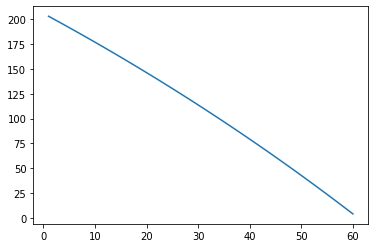

In [234]:
# Not the prettiest plot
plt.plot(month_number, interest_paid)

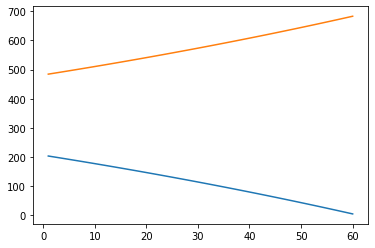

In [235]:
plt.plot(month_number, interest_paid)
plt.plot(month_number, principal_paid)

In [236]:
# Our style choices
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

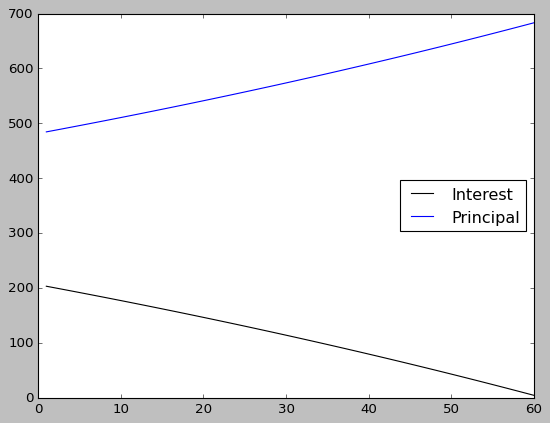

In [250]:
plt.style.use('classic')

plt.plot(month_number, interest_paid, c= 'k', label = 'Interest')
plt.plot(month_number, principal_paid, c = 'b', label = 'Principal')
plt.legend(loc="center right")

(0.0, 1000.0)

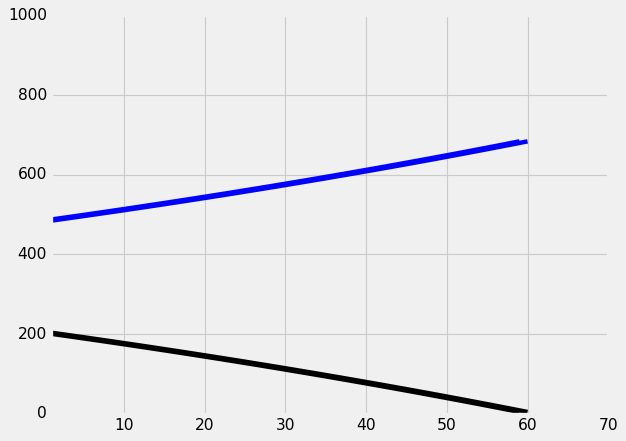

In [257]:
plt.style.use('fivethirtyeight')

plt.plot(month_number, interest_paid,interest_paid, c= 'k')
plt.plot(month_number, principal_paid,principal_paid, c = 'b')
plt.xlim(left=1,right=70)
plt.ylim(bottom=0,top=1000)

Text(0, 0.5, 'Dollars')

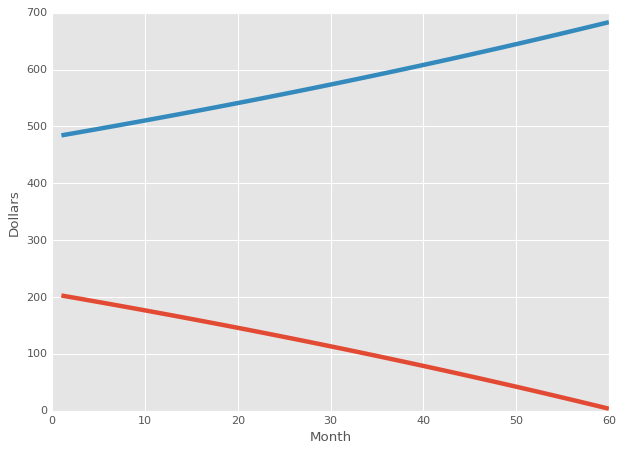

In [258]:
plt.style.use('ggplot')

plt.plot(month_number, interest_paid)
plt.plot(month_number, principal_paid)
plt.xlabel('Month')
plt.ylabel('Dollars')

Text(0.5, 1.0, 'Interest and Principal Paid Each Month')

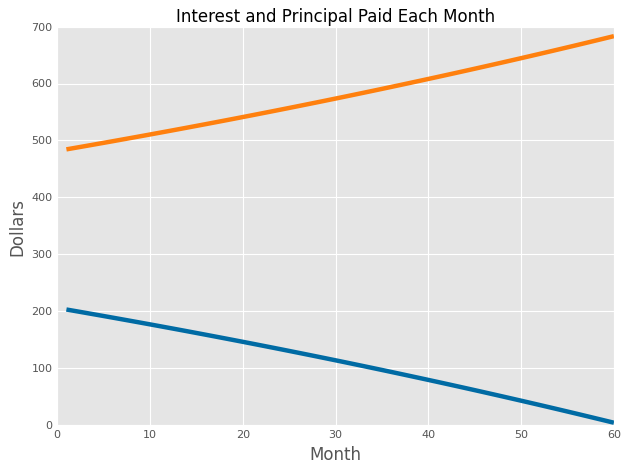

In [259]:
plt.style.use('tableau-colorblind10')

plt.plot(month_number, interest_paid)
plt.plot(month_number, principal_paid)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Dollars', fontsize = 15)
plt.title('Interest and Principal Paid Each Month', fontsize = 15)

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

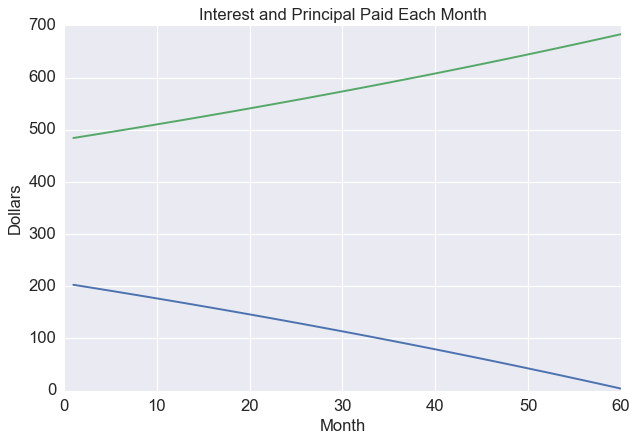

In [260]:
plt.style.use('seaborn')

plt.plot(month_number, interest_paid)
plt.plot(month_number, principal_paid)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Dollars', fontsize = 15)
plt.title('Interest and Principal Paid Each Month', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

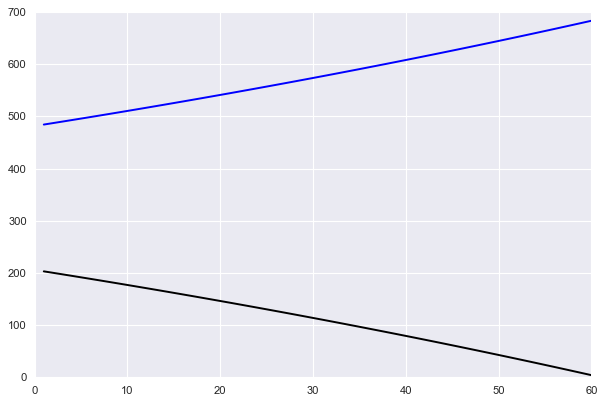

In [242]:
#grids
plt.plot(month_number, interest_paid, c= 'k')
plt.plot(month_number, principal_paid, c = 'b')

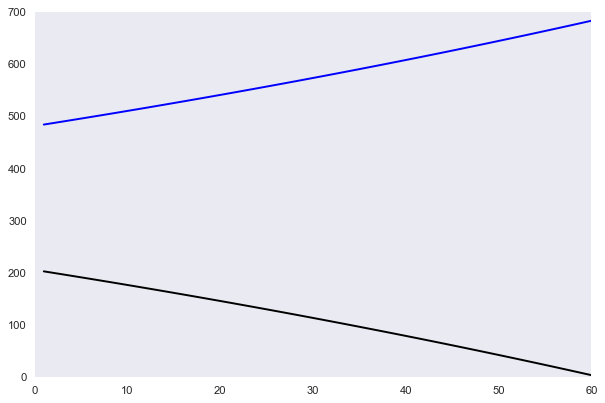

In [245]:
#MATLAB-style
plt.plot(month_number, interest_paid, c= 'k')
plt.plot(month_number, principal_paid, c = 'b')
plt.grid(c = 'g', 
         alpha = .9,
         linestyle = '-')

#grid lines, transparency, and linestyl

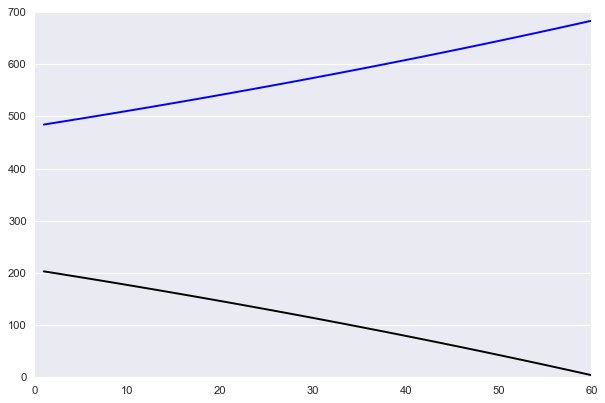

In [244]:
# only horizontal grid lines
plt.plot(month_number, interest_paid, c= 'k')
plt.plot(month_number, principal_paid, c = 'b')
plt.grid(axis = 'x')
#for vertical : plt.grid(axis = 'y')

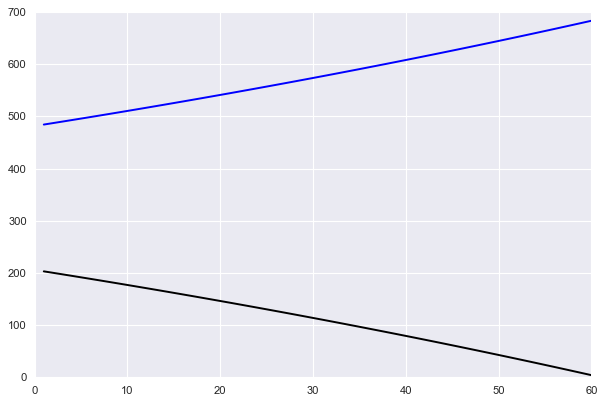

In [246]:
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows = 1, ncols = 1);
axes.plot(month_number, interest_paid, c= 'k');
axes.plot(month_number, principal_paid, c = 'b');

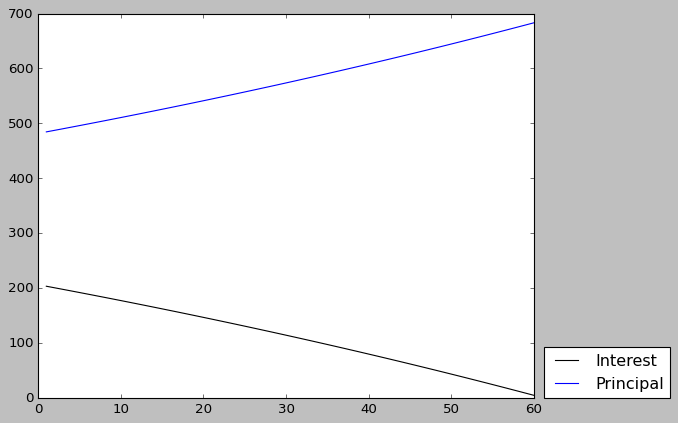

In [251]:
# At least the legend is not overlapping with the graph
fig, axes = plt.subplots(nrows = 1, ncols = 1);
axes.plot(month_number, interest_paid, c= 'k', label = 'Interest');
axes.plot(month_number, principal_paid, c = 'b', label = 'Principal');
axes.legend(loc=(1.02,0))

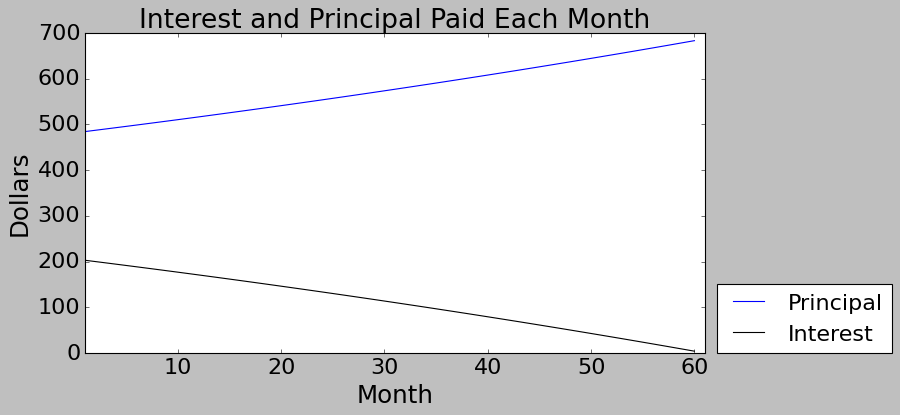

In [252]:
# an image may good in the notebook, but it may not save that way
plt.figure(figsize=(10, 5))
plt.plot(month_number, principal_paid, c = 'b', label = 'Principal')
plt.plot(month_number, interest_paid, c= 'k', label = 'Interest')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(left =1 , right = 61)
plt.ylim(bottom = 0, top = 700)
plt.xlabel('Month', fontsize = 22);
plt.ylabel('Dollars', fontsize = 22);
plt.title('Interest and Principal Paid Each Month', fontsize = 24)
plt.legend(loc=(1.02,0), borderaxespad=0, fontsize = 20)

In [253]:
plt.savefig('images/mslegendcutoff.png', dpi = 300)

<Figure size 640x480 with 0 Axes>

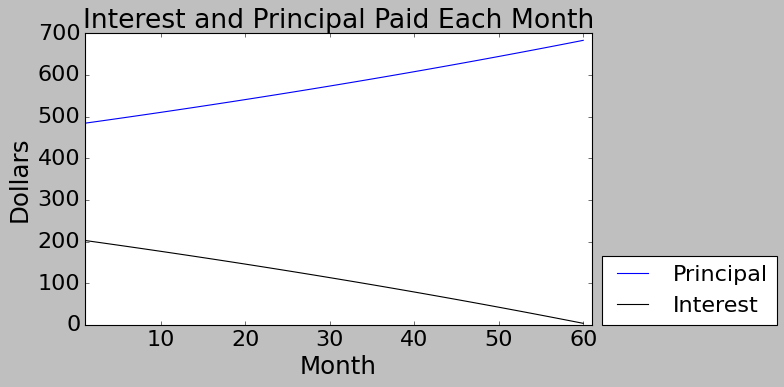

In [254]:
# tight_layout()
# automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.figure(figsize=(10, 5))
plt.plot(month_number, principal_paid, c = 'b', label = 'Principal')
plt.plot(month_number, interest_paid, c= 'k', label = 'Interest')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(left =1 , right = 61)
plt.ylim(bottom = 0, top = 700)
plt.xlabel('Month', fontsize = 22);
plt.ylabel('Dollars', fontsize = 22);
plt.title('Interest and Principal Paid Each Month', fontsize = 24)
plt.legend(loc=(1.02,0), borderaxespad=0, fontsize = 20)

plt.tight_layout()
plt.savefig('images/mslegend.png', dpi = 300)

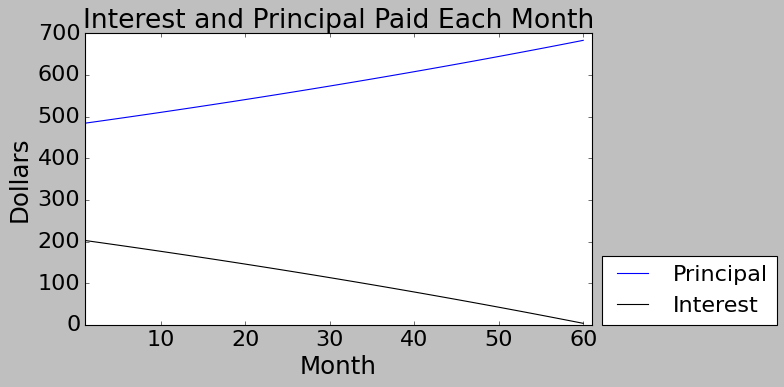

In [255]:
# tight_layout()
# automatically adjusts subplot params so that the subplot(s) fits in to the figure area
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )
axes.plot(month_number, principal_paid, c = 'b', label = 'Principal')
axes.plot(month_number, interest_paid, c= 'k', label = 'Interest')
axes.tick_params(axis = 'x', labelsize = 20)
axes.tick_params(axis = 'y', labelsize = 20)
axes.set_xlim(left =1 , right = 61)
axes.set_ylim(bottom = 0, top = 700)
axes.set_xlabel('Month', fontsize = 22);
axes.set_ylabel('Dollars', fontsize = 22);
axes.set_title('Interest and Principal Paid Each Month', fontsize = 24)
axes.legend(loc=(1.02,0), borderaxespad=0, fontsize = 20)

fig.tight_layout()
fig.savefig('images/objectlegend.png', dpi = 300)

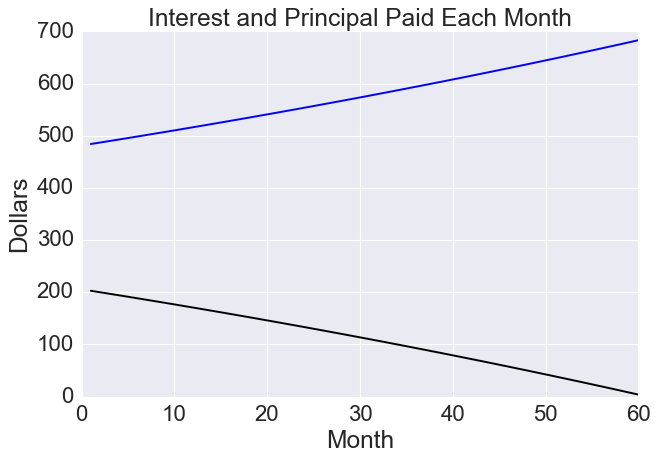

In [261]:
# Changing tick font size
fig, axes = plt.subplots(nrows = 1, ncols = 1);
axes.plot(month_number, interest_paid, c= 'k');
axes.plot(month_number, principal_paid, c = 'b');
axes.set_xlabel('Month', fontsize = 22);
axes.set_ylabel('Dollars', fontsize = 22);
axes.set_title('Interest and Principal Paid Each Month', fontsize = 22);
axes.tick_params(axis = 'x', labelsize = 20)
axes.tick_params(axis = 'y', labelsize = 20)

## Change Color
The `c` parameter accepts strings.

string | color
--- | ---
'b' | blue
'blue' | blue
'g' | green
'green' | green
'r' | red
'red' | red
'c' | cyan
'cyan' | cyan
'm' | magenta
'magenta' | magenta
'y' | yellow
'yellow' | yellow
'k' | black
'black' | black
'w' | white
'white' | white

The parameter also accepts hex strings. For instance, green is '#008000'. Additionally you can use rgb tuples.

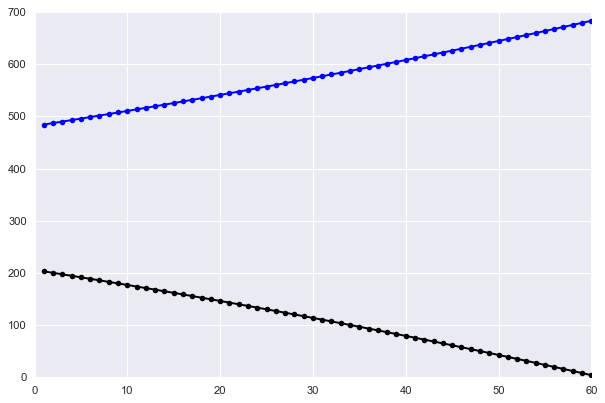

In [262]:
# Using hex strings
# '#000000' is black
# '#0000FF' is blue
plt.plot(month_number, interest_paid,c = '#000000', marker = '.', markersize = 10)
plt.plot(month_number, principal_paid,c = '#0000FF', marker = '.', markersize = 10)

### Marker Type
Here are a couple common marker types. 

string | description
--- | ---
'.' | point marker
',' | pixel marker
'o' | circle marker
'v' | triangle_down marker
'^' | triangle_up marker
'<' | triangle_left marker
'>' | triangle_right marker
's'	| square marker
'\*' | star marker
'+' | plus marker
'x' | x marker
's'	| square marker

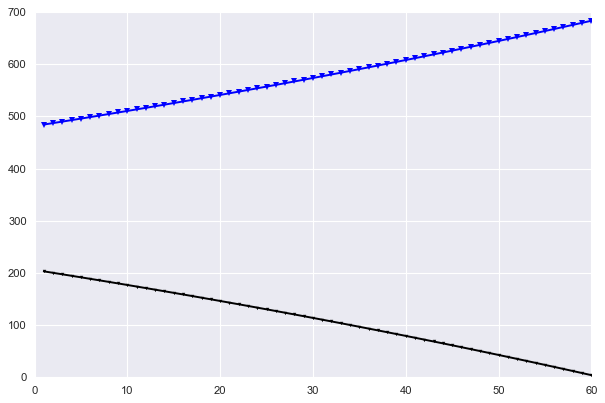

In [267]:
# Using rgb tuples
# (0, 0, 0) is black
# (0, 0, 1) is blue
plt.plot(month_number, interest_paid,c = (0, 0, 0), marker = 'v', markersize = 3)
plt.plot(month_number, principal_paid,c = (0, 0, 1), marker = 'v', markersize = 5)

In [277]:
df2.columns.tolist()

['Month',
 'Starting Balance',
 'Repayment',
 'Interest Paid',
 'Principal Paid',
 'New Balance',
 'term',
 'interest_rate',
 'car_type']

### Histogram


It is a common practice to create histograms to explore your data as it can give you a general idea of what your data looks like. A histogram is a summary of the variation in a measured variable. It shows the number of samples that occur in a category. A histogram is a type of frequency distribution.  

Histograms work by binning the entire range of values into a series of intervals and then counting how many values fall into each interval. While the intervals are often of equal size, they are not required to be.

<AxesSubplot:>

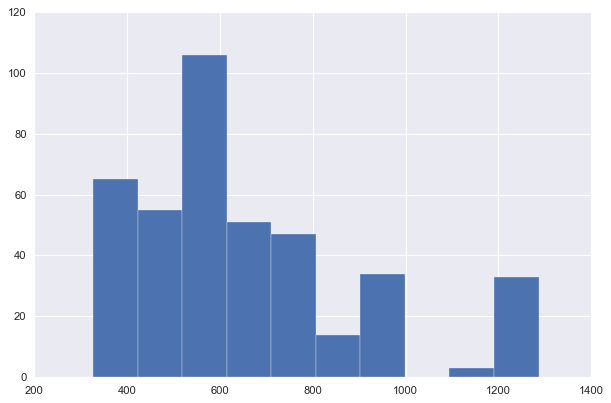

In [278]:
df2['Principal Paid'].hist()

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

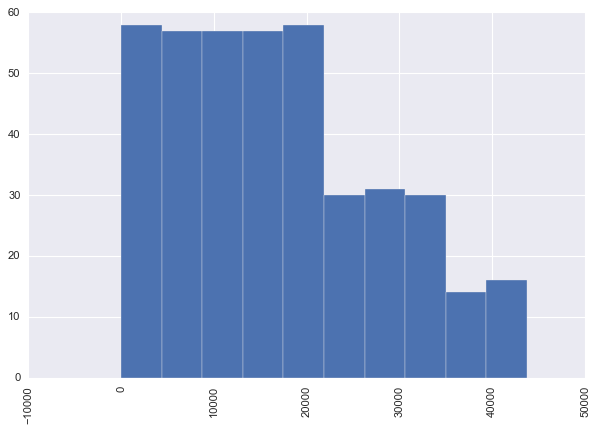

In [279]:
# One solution is to rotate your xticklabels
df2['New Balance'].hist()
plt.xticks(rotation = 90)

<AxesSubplot:>

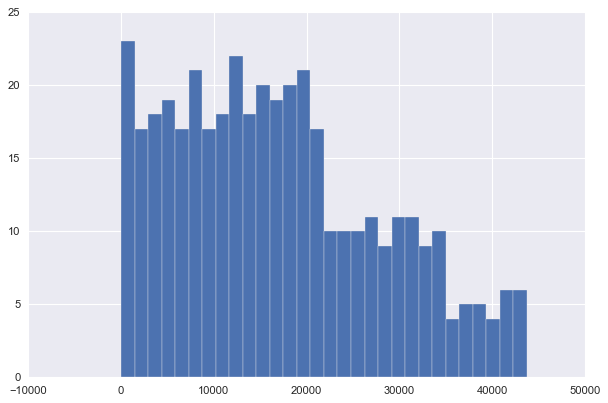

In [281]:
# if you want a quick solution to make the xticklabels readable,
# try changing the plot style 
plt.style.use('seaborn')

# Change the number of bins
# Seems better, but we still have empty space
df2['New Balance'].hist(bins = 30)

<AxesSubplot:>

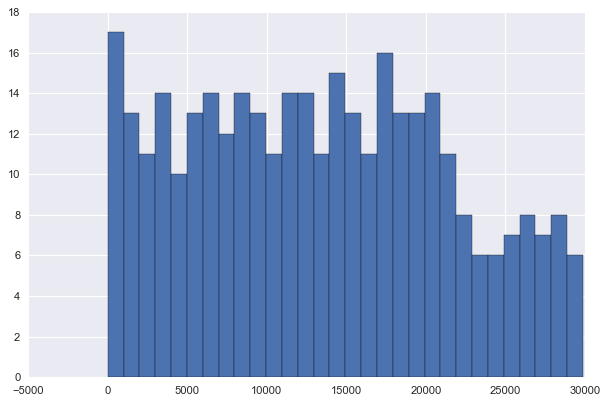

In [284]:
# visualizing a subset of the data
price_filter = df2.loc[:, 'New Balance'] <= 30000
df2.loc[price_filter, 'New Balance'].hist(bins = 30,edgecolor='black')